## GA3C-CADRL
#### GPU/CPU Asynchronous Advantage Actor-Critic for Collision Avoidance with Deep Reinforcement Learning
Michael Everett, Yu Fan Chen, and Jonathan P. How<br>
2018 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS)<br>
Paper: https://arxiv.org/abs/1805.01956<br>
Video: https://www.youtube.com/watch?v=XHoXkWLhwYQ<br>

**Objective:** This goal of this notebook is to explain how to use our code, enabling other researchers to test and compare against the results presented in the paper. After reading this notebook, it should also be clear how our code could be implemented on your own system (i.e. what format you should provide as input, and what information you'll get as output)

## Create an instance of an Agent
The most important class is Agent, which has attributes such as radius and position, and methods such as find_next_action. The environment is made up of several Agents.

In [11]:
import agent
import network
import util
import numpy as np

### Load trained network

In [12]:
possible_actions = network.Actions()
num_actions = possible_actions.num_actions
nn = network.NetworkVP_rnn(network.Config.DEVICE, 'network', num_actions)
nn.simple_load('../checkpoints/network_01900000')

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Restoring parameters from ../checkpoints/network_01900000


### Set current state of host agent

In [13]:
start_x = 2
start_y = 5
goal_x = 3
goal_y = 2
radius = 0.5
pref_speed = 1.2
heading_angle = 0.
index = 0
v_x = 0
v_y = 0

host_agent = agent.Agent(start_x, start_y, goal_x, goal_y, 
                         radius=radius, pref_speed=pref_speed, initial_heading=heading_angle,
                         id=index)
host_agent.vel_global_frame = np.array([v_x, v_y])

### Set current state of other agents

In [14]:
# Sample observation data in a format easily generated from sensors
other_agents_x = [-1,-2,-3]
other_agents_y = [2,3,4]
other_agents_r = [0.5, 0.4, 0.3]
other_agents_vx = [1.0, 0.6, 0.2]
other_agents_vy = [0.0, 0.6, 0.8]
num_other_agents = len(other_agents_x)

# Create Agent objects for each observed dynamic obstacle
other_agents = []
for i in range(num_other_agents):
    x = other_agents_x[i]; y = other_agents_y[i]
    v_x = other_agents_vx[i]; v_y = other_agents_vy[i]
    radius = other_agents_r[i]
    
    other_agent = agent.Agent(x, y, goal_x, goal_y, radius=radius, id=i+1)
    other_agent.vel_global_frame = np.array([v_x, v_y])
    other_agents.append(other_agent)

### Convert agent states into observation vector

In [15]:
obs = host_agent.observe(other_agents)[1:]
obs = np.expand_dims(obs, axis=0)

### Plot observation in agent's ego frame (goal at origin, agent on x-axis)

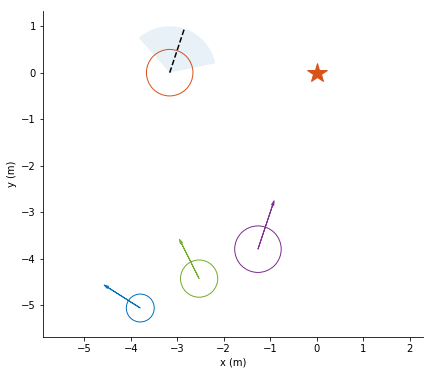

In [18]:
util.plot_current_state_ego_frame(obs)
# Dashed line shows ego agent's current heading (in ego frame)
# Blue wedge shows bounds of possible new heading angles

### Query the policy based on observation vector

In [17]:
predictions = nn.predict_p(obs)[0]
raw_action = possible_actions.actions[np.argmax(predictions)]
action = np.array([host_agent.pref_speed*raw_action[0], util.wrap(raw_action[1] + host_agent.heading_global_frame)])
print "action:", action
# Action contains: [new forward speed, change in heading angle]

action: [ 1.2        -0.52359878]
